Based on: https://github.com/openai/openai-cookbook/blob/main/examples/Regression_using_embeddings.ipynb
and: https://github.com/JiayaoLi00/CMPE255/blob/main/gpt3/resume_classification_gpt3_part4_classification.ipynb

In [2]:
#https://scikit-learn.org/stable/modules/ensemble.html
#https://beta.openai.com/docs/guides/embeddings/use-cases
!pip install openai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 44 kB 2.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 146 kB 61.0 MB/s 
  Created wheel for openai: filename=openai-0.25.0-py3-none-any.whl size=55880 sha256=134f277c8625b1dbe450357acd1d381471c0eb8063c124aed20838a02282eef5
  Stored in directory: /root/.cache/pip/wheels/4b/92/33/6f57c7aae0b16875267999a50570e81f15eecec577ebe05a2e
Successfully built openai


In [3]:
import pandas as pd
import numpy as np
import openai
from sklearn.metrics import classification_report
from openai.embeddings_utils import cosine_similarity, get_embedding
from sklearn.metrics import PrecisionRecallDisplay

data_train_path = '/content/train_with_embedding.csv'
data_test_path = '/content/test_with_embedding.csv'

df_train = pd.read_csv(data_train_path)
df_test = pd.read_csv(data_test_path)

openai.api_key = "sk-key"

df_train['babbage_similarity'] = df_train.babbage_similarity.apply(eval).apply(np.array)
df_train['babbage_search'] = df_train.babbage_search.apply(eval).apply(np.array)

df_test['babbage_similarity'] = df_test.babbage_similarity.apply(eval).apply(np.array)
df_test['babbage_search'] = df_test.babbage_search.apply(eval).apply(np.array)

X_train = list(df_train.babbage_similarity.values)
X_test = list(df_test.babbage_similarity.values)
y_train = df_train.Category
y_test = df_test.Category

In [4]:

from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score

clf = AdaBoostClassifier(n_estimators=100)
clf.fit(X_train, y_train)
preds = clf.predict(X_test)
probas = clf.predict_proba(X_test)

report = classification_report(y_test, preds)
print(accuracy_score(y_test, preds))

0.1903114186851211


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [5]:
from sklearn.linear_model import LogisticRegression


#adopted from https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression().fit(X_train, y_train)

y_pred_test2 = logreg.predict(X_test)
print(accuracy_score(y_test, y_pred_test2))

#0.8131487889273357

0.8131487889273357


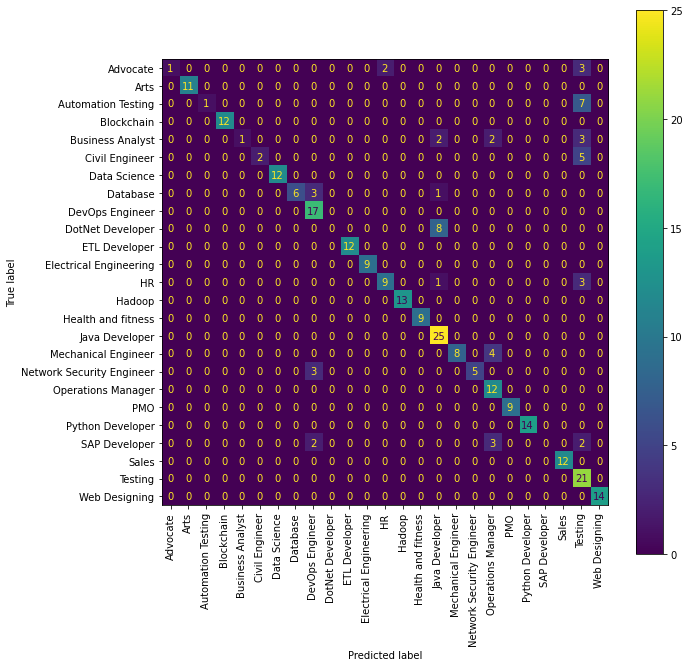

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
#from: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html
fig, ax = plt.subplots(figsize=(10,10))

cm = confusion_matrix(y_test, y_pred_test2, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=logreg.classes_)


disp.plot(ax=ax, xticks_rotation = 'vertical')